**Garlapally Sumith**

**Oasis Infobyte (Data Science) - Task-5**

**Sales Prediction**

**Importing Libraries**

In [108]:
import pandas as pd

In [109]:
import numpy as np

In [110]:
import matplotlib.pyplot as plt


In [111]:
import seaborn as sns

In [112]:
from google.colab import files


uploaded = files.upload()

Saving Advertising.csv to Advertising (1).csv


In [113]:
df = pd.read_csv('Advertising.csv')

In [114]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [115]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

**There are total 5 columns in the Dataset**

In [116]:
df.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

**There are 200 Rows and 4 Columns**

In [117]:
df.shape

(200, 4)

In [118]:
df.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


**Displaying the first 2 entries of the dataset**

In [12]:
df.iloc[1]

TV           44.5
Radio        39.3
Newspaper    45.1
Sales        10.4
Name: 1, dtype: float64

In [119]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Preprocessing the Data**

checking the null values

In [120]:
df.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [121]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**There are no null values in the datset**

In [122]:
df.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [123]:
df.duplicated().sum()

0

**Data Visualization**

Text(0, 0.5, 'Sales')

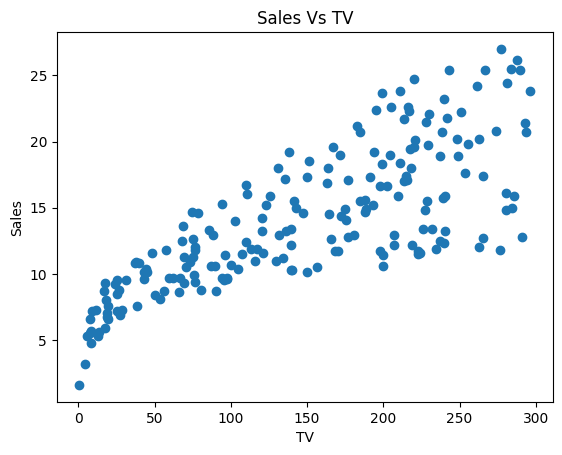

In [125]:
plt.scatter(df['TV'], df['Sales'])
plt.title("Sales Vs TV")
plt.xlabel('TV')
plt.ylabel('Sales')

**The horizontal axis represents the TV advertising expenditure, measured in monetary units, while the vertical axis signifies the sales figures.
The graph shows a positive trend, indicating that increased investment in television advertising is often associated with higher sales.**

Text(0, 0.5, 'Sales')

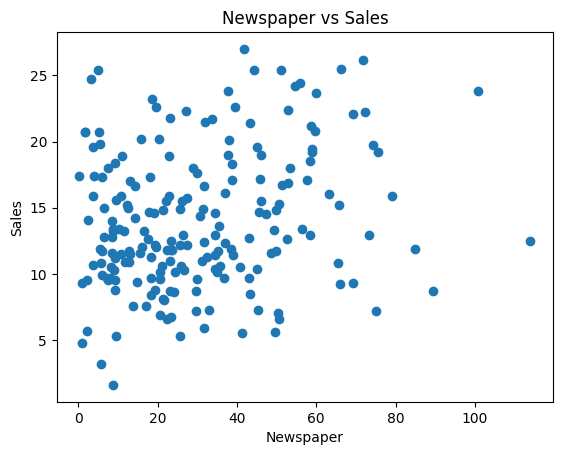

In [126]:
plt.scatter(x=df['Newspaper'], y=df['Sales'])
plt.title("Newspaper vs Sales")
plt.xlabel("Newspaper")
plt.ylabel("Sales")

**The horizontal axis represents the Newspaper advertising expenditure, measured in monetary units, while the vertical axis signifies the sales figures The graph reveals the impact of newspaper advertising on sales performance. The expenditure on newspaper advertising increases along the horizontal axis, the sales figures, indicated on the vertical axis, exhibit varying patterns**

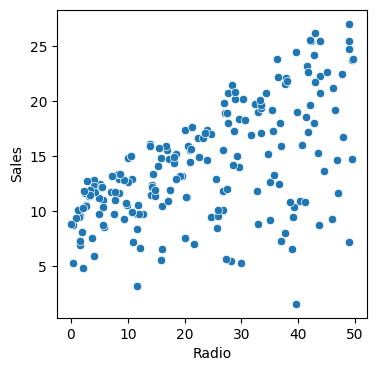

In [185]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x=df['Radio'],y=df['Sales'])
plt.show()

In [124]:
x=df.drop('Sales',axis=1)

In [22]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [23]:
y=df['Sales']

In [24]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

**Importing train_test_split to train and test the dataset**

In [43]:
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [44]:
from sklearn.model_selection import train_test_split

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [132]:
x_train.shape

(160, 3)

**x_train shape of (160, 3) it means there are 160 training samples, and each sample has 4 features or input variables**

In [133]:
x_test.shape

(40, 3)

**x_test has a shape (40,3) it means that there are 40 test samples, and each samples has 4 features or input variables**

**Creating a Model**

In [134]:
model = LinearRegression()

**Fit the model into the training data**

In [135]:
model.fit(x_train, y_train)

LinearRegression()

**Make predictions on the test data**

In [136]:
y_pred=model.predict(x_test)

In [137]:
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [138]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [139]:
import numpy as np

**Evaluate the model for its accuracy**

**R-squared**

In [140]:
r_squared =r2_score(y_test, y_pred)

In [141]:
print("R-Squared", r_squared)

R-Squared 0.899438024100912


In [142]:
y_pred = model.predict([[8.6, 2.1, 1]])

In [143]:
print(*y_pred)

3.7638119165871475


**Mean Absolute Error**

In [144]:
from sklearn import metrics

In [145]:
y_pred = model.predict(x_test)

In [146]:
mae = mean_absolute_error(y_test, y_pred)

In [147]:
print("MAE", mae)

MAE 1.4607567168117603


In [148]:
y_pred = model.predict([[8.6, 2.1, 1]])

In [149]:
print(*y_pred)

3.7638119165871475


**Root Mean Square Error**

In [152]:
y_pred = model.predict(x_test)

In [153]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [154]:
print("RMSE", rmse)

RMSE 1.78159966153345


In [155]:
y_pred = model.predict([[8.6, 2.1, 1]])

In [156]:
print(*y_pred)

3.7638119165871475


**Decision Tree Regressor**

In [171]:
from sklearn.linear_model import LinearRegression

In [161]:
from sklearn.tree import DecisionTreeRegressor

In [163]:
model = DecisionTreeRegressor()

In [164]:
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [165]:
y_pred = model.predict(x_test)

In [166]:
mse = mean_squared_error(y_test, y_pred)

In [167]:
print("MSE", mse)

MSE 1.7012500000000004


**Using Linear Regression**


In [172]:
model_lr = LinearRegression()

In [173]:
model_lr.fit(x_train, y_train)

LinearRegression()

In [174]:
y_pred_lr = model_lr.predict(x_test)

In [ ]:
mse_lr = mean_squared_error(y_test, y_pred_lr)

In [175]:
print('Linear Regression MSE:', mse_lr)

Linear Regression MSE: 3.1740973539761033


**Using Random Forest Regressor**

In [176]:
from sklearn.ensemble import RandomForestRegressor

In [177]:
model_rf = RandomForestRegressor(n_estimators=100)

In [178]:
model_rf.fit(x_train, y_train)

RandomForestRegressor()

In [179]:
y_pred_rf = model_rf.predict(x_test)

In [180]:
mse_rf = mean_squared_error(y_test, y_pred_rf)

In [181]:
print('Random Forest MSE:', mse_rf)

Random Forest MSE: 0.5559962249999993


**All the three algorithms**

In [184]:
print('Linear Regression R^2:', model.score(x_test, y_test))
print('Decision Tree R^2:', model.score(x_test, y_test))
print('Random Forest R^2:', model.score(x_test, y_test))

Linear Regression R^2: 0.9461008776923572
Decision Tree R^2: 0.9461008776923572
Random Forest R^2: 0.9461008776923572


**End of the Code**